# Financials 

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import pandas as pd

financials = pd.read_csv('/content/drive/MyDrive/Dissertation/Data/raw/financials.csv')

- ebitda 
- price to book 

In [ ]:
financials

,Instrument,Date,Revenue,Gross Profit,Enterprise Value (Daily Time Series),Free Cash Flow,P/E (Daily Time Series Ratio),Dividend yield,"Net Profit Margin, (%)",Current Ratio,Quick Ratio
0,LSEG.L,2022-12-31,7743.000,6679.000,51061.874763,1316.000,55.849742,1.373211,10.20276,1.00166,1.00166
1,LSEG.L,2022-12-31,7743.000,6679.000,47306.315085,1316.000,46.249068,1.344171,10.20276,1.00166,1.00166
2,LSEG.L,2021-12-31,6535.000,5676.000,50107.492567,1039.000,49.437765,1.187797,7.05432,1.00284,1.00284
3,LSEG.L,2021-12-31,6535.000,5676.000,50188.183912,1039.000,90.661788,1.200101,7.05432,1.00284,1.00284
4,LSEG.L,2021-12-31,6535.000,5676.000,52045.014237,1039.000,94.629429,1.062327,7.05432,1.00284,1.00284
...,...,...,...,...,...,...,...,...,...,...,...
310,MKTX.O,2018-12-31,435.565,411.699,9023.317443,85.507,54.018575,0.949853,39.59271,NaN,NaN
311,MKTX.O,2018-12-31,435.565,411.699,7733.607095,85.507,46.488246,0.801259,39.59271,NaN,NaN
312,MKTX.O,2017-12-31,393.422,373.374,6535.356435,104.618,40.355784,0.867007,40.61517,NaN,NaN
313,MKTX.O,2017-12-31,393.422,373.374,7284.644186,104.618,45.462483,0.845794,40.61517,NaN,NaN


In [ ]:
# calculate percentage of NaN values in each column
nan_percent = financials.isna().mean() * 100
print(nan_percent)

Instrument                               0.000000
Date                                     0.000000
Revenue                                  0.000000
Gross Profit                            13.333333
Enterprise Value (Daily Time Series)     0.000000
Free Cash Flow                           0.000000
P/E (Daily Time Series Ratio)            0.634921
Dividend yield                          12.063492
Net Profit Margin, (%)                   0.000000
Current Ratio                            6.666667
Quick Ratio                              6.666667
dtype: float64


In [ ]:
#data type
# convert 'Date' column to datetime
financials['Date'] = pd.to_datetime(financials['Date'])

#setting the date as the index 
financials = financials.set_index('Date')
financials.dtypes

Instrument                               object
Revenue                                 float64
Gross Profit                            float64
Enterprise Value (Daily Time Series)    float64
Free Cash Flow                          float64
P/E (Daily Time Series Ratio)           float64
Dividend yield                          float64
Net Profit Margin, (%)                  float64
Current Ratio                           float64
Quick Ratio                             float64
dtype: object

## descriptive

In [ ]:
#the general industry stats
#lseg sits around 3.5 k revenue - appena sopra il 50% 
financials.describe()

,Revenue,Gross Profit,Enterprise Value (Daily Time Series),Free Cash Flow,P/E (Daily Time Series Ratio),Dividend yield,"Net Profit Margin, (%)",Current Ratio,Quick Ratio
count,315.000000,273.000000,315.000000,315.000000,313.000000,277.000000,315.000000,294.000000,294.000000
mean,4360.423556,2411.594275,45019.937033,877.822752,59.681439,1.241496,28.843934,1.340108,1.339414
std,3753.172195,1807.272618,57723.142988,1017.556030,380.128073,0.566683,16.998838,0.538346,0.538386
min,393.422000,373.374000,-118122.173108,-54.400000,12.426179,0.397790,-0.136910,0.398890,0.398890
25%,1955.000000,1048.223000,12853.970778,250.196500,26.213720,0.828524,17.256720,1.005790,1.005790
50%,3315.400000,1630.300000,29628.800000,463.800000,32.911474,1.080282,27.131780,1.105040,1.105040
75%,5735.000000,3442.000000,56187.158000,1039.000000,44.315034,1.609658,35.606300,1.666573,1.666573
max,19471.000000,7415.000000,401953.595773,4964.000000,6756.177156,3.650718,108.700300,3.047240,3.047240


In [ ]:
#the general industry stats
# potresti dare un occhio al percentile 
financials.groupby('Instrument').mean()

,Revenue,Gross Profit,Enterprise Value (Daily Time Series),Free Cash Flow,P/E (Daily Time Series Ratio),Dividend yield,"Net Profit Margin, (%)",Current Ratio,Quick Ratio
Instrument,,,,,,,,,
0388.HK,15480.095238,NaN,198839.019433,3229.428571,40.045423,2.328006,65.718158,1.089923,1.089923
CBOE.K,3016.738095,1276.523810,12736.413330,368.871429,34.024884,1.454499,13.098188,1.392462,1.392462
CME.O,4570.271429,NaN,69161.701307,620.995238,26.443169,1.791069,56.364483,1.016786,1.016786
DB1GnEUR.xbo,3698.909524,3134.195238,31403.738687,624.871429,24.480199,2.058722,28.563189,1.014873,1.014873
EEFT.O,2692.108190,1063.897524,5760.435687,170.239857,391.343962,NaN,6.217093,1.657000,1.647291
FDS,1498.011524,912.148190,12425.662097,252.612333,34.260752,0.979002,23.390529,2.500335,2.500335
ICE,7511.476190,5807.142857,65478.091066,2055.523810,24.863318,1.247947,30.618693,1.002129,1.002129
LSEG.L,3509.095238,3090.476190,33775.102279,600.285714,66.262399,1.072396,15.785543,1.001562,1.001562
MCO,5094.814286,3673.204762,52398.874546,1295.266667,30.202393,0.897218,30.769799,1.709384,1.709384


In [ ]:
#the general industry stats
financials.groupby('Instrument').mean()['P/E (Daily Time Series Ratio)']

Instrument
0388.HK          40.045423
CBOE.K           34.024884
CME.O            26.443169
DB1GnEUR.xbo     24.480199
EEFT.O          391.343962
FDS              34.260752
ICE              24.863318
LSEG.L           66.262399
MCO              30.202393
MKTX.O           57.160011
MORN.O           49.004177
MSCI.K           49.371896
NDAQ.O           24.047027
SPGI.K           31.557681
VRSK.O           43.741205
Name: P/E (Daily Time Series Ratio), dtype: float64

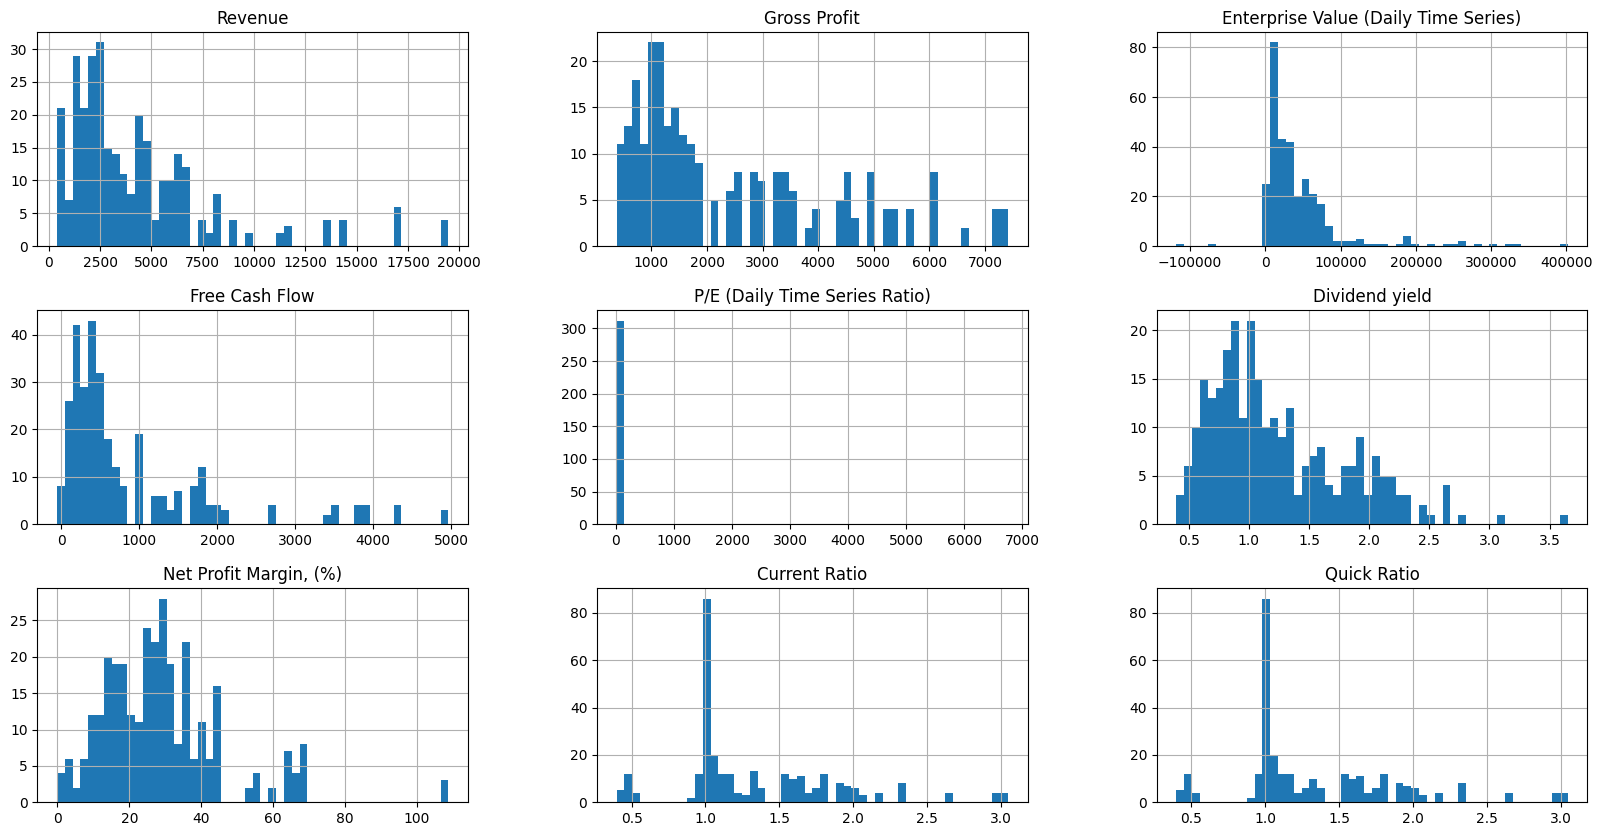

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
financials.hist(bins=50, figsize=(20,10))
plt.show()

In [ ]:
import plotly.graph_objects as go

# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
fig = go.Figure(go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    showscale=True
))

fig.update_layout(title='Correlation Matrix Heatmap')
fig.show()

<ipython-input-42-b8c69c549087>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## trends

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Define the color groups
blue = ['ICE', 'NDAQ.O', 'EEFT.O', 'CME.O', 'CBOE.K', '0388.HK', 'DB1GnEUR.xbo', 'MKTX.O'] #exchangee
yellow = ['MCO', 'MORN.O', 'SPGI.K', 'MSCI.K', 'VRSK.O', 'FDS'] #data
red = ['LSEG.L']

# Combine the groups to create the hue_order and palette
hue_order = blue + yellow + red
palette = ['#1f77b4'] * len(blue) + ['#ffcc00'] * len(yellow) + ['#d62728'] * len(red)

In [ ]:
# Calculate the average value for each financial variable by instrument
mean_values = df.groupby('Instrument').mean().reset_index()

# Create a bar plot for each numerical column
for column in numerical_columns:
    fig = px.bar(mean_values, x='Instrument', y=column, color='Instrument', color_discrete_map=color_map, title=f'Average {column} by Instrument')
    fig.show()

In [ ]:
# Calculate the average value for each financial variable by instrument and date
mean_values_by_date = df.groupby(['Instrument', 'Date'])[numerical_columns].mean().reset_index()

# Create line plots for each numerical column
for column in numerical_columns:
    fig = px.line(mean_values_by_date, x='Date', y=column, color='Instrument', color_discrete_map=color_map, title=f'Average {column} by Instrument Over Time', markers=True)
    fig.show()


## Clustering 

<ipython-input-27-0376f4547b01>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

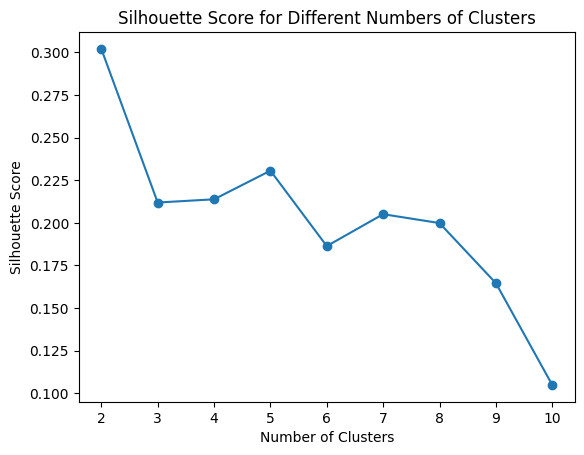

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples

# Preprocess the data: group by instrument and compute the mean
mean_values = df.groupby('Instrument')[numerical_columns].mean()

# Fill NaN values with column averages
mean_values_filled = mean_values.fillna(mean_values.mean())

# Scale the data
scaler = StandardScaler()
scaled_mean_values = scaler.fit_transform(mean_values_filled)

# Define a range of number of clusters to try
min_clusters = 2
max_clusters = 10
range_n_clusters = range(min_clusters, max_clusters + 1)

# Compute silhouette scores for different number of clusters
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_mean_values)
    silhouette_avg = silhouette_score(scaled_mean_values, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(range_n_clusters)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preprocess the data: group by instrument and compute the mean
mean_values = df.groupby('Instrument')[numerical_columns].mean()

# Fill NaN values with column averages
mean_values_filled = mean_values.fillna(mean_values.mean())

# Scale the data
scaler = StandardScaler()
scaled_mean_values = scaler.fit_transform(mean_values_filled)

# Apply K-means clustering
n_clusters = 5  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_mean_values)

# Add the cluster labels to the DataFrame
mean_values_filled['Cluster'] = cluster_labels

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_mean_values)
mean_values_filled['PCA1'] = pca_result[:, 0]
mean_values_filled['PCA2'] = pca_result[:, 1]

# Plot the clusters
fig = px.scatter(mean_values_filled.reset_index(), x='PCA1', y='PCA2', color='Cluster', text='Instrument', title='K-means Clustering of Companies')
fig.show()


<ipython-input-29-54904df09ad1>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

